In [1]:
import numpy as np
import os

import subprocess
from subprocess import Popen
from multiprocessing.pool import ThreadPool

executable_path = "/home/b502b586/ardupilot-workspace/ns3-mavsdk/build/src/ardupilot/examples/"

working_dir = '/home/b502b586/ardupilot-workspace/experiments'
os.chdir(working_dir)

In [2]:
import matplotlib.pyplot as plt

from data_utils import *
from plotting_utils import *

# plt.style.use('fivethirtyeight')
plt.style.use('Solarize_Light2')
plt.rcParams.update({'font.size': 34, })
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24

save_enabled = False
save_format = "png"

def plot_everything(path, save_format):
    save_dir = '%s/saved_results' % path
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    n_row = 12

    fig, axs = plt.subplots(n_row, 1, figsize=(30, n_row * 9))
    ############################# Plotting transmission rate ###############################
    plot_transmission_rate(axs[0], path, save_enabled, save_dir, save_format)

    ############################# Plotting Reception rate ###############################
    plot_reception_rate(axs[1], path, save_enabled, save_dir, save_format)

    ############################# Plotting DL SINR ###############################


    plot_dl_rsrp(axs[2], path, save_enabled, save_dir, save_format)
    plot_dl_sinr(axs[3], path, save_enabled, save_dir, save_format)

    plot_ul_sinr(axs[4], path, save_enabled, save_dir, save_format)

    plot_ul_rx_mcs(axs[5], path, save_enabled, save_dir, save_format)
    plot_ul_tx_mcs(axs[6], path, save_enabled, save_dir, save_format)

    plot_ul_mac_stats(axs[7], path, save_enabled, save_dir, save_format)

    # plot_trajectory(axs[8], path, save_enabled, save_dir, save_format)

    plot_distance(axs[8], path, save_enabled, save_dir, save_format)
    plot_pucch_power(axs[9], path, save_enabled, save_dir, save_format)
    plot_pusch_power(axs[10], path, save_enabled, save_dir, save_format)
    plot_srs_power(axs[11], path, save_enabled, save_dir, save_format)

    # fig.tight_layout()

    plt.savefig('%s/all.png' % (save_dir))
    # plt.show()


In [25]:
sim_time = 800
# valid_frequencies = ["700", "1500", "2600"]
valid_frequencies = ["2600"]
# valid_bw = ["6", "15", "25", "50", "75", "100"]
# valid_bw = ["50", "100"]
valid_bw = ["100"]
# valid_scenarios = ["UMa", "UMi", "RMa"]
valid_scenarios = ["RMa"]
# valid_video_qualities = ["800p", "1280p", "1920p"]
valid_video_qualities = ["1920p"]
valid_fr_algs = ["ns3::LteFrNoOpAlgorithm", "ns3::LteFrHardAlgorithm", "ns3::LteFrStrictAlgorithm", 
                 "ns3::LteFrSoftAlgorithm", "ns3::LteFfrSoftAlgorithm", "ns3::LteFfrEnhancedAlgorithm"]


# simulated_nb_users = ['1', '3', '5', '10', '15', '25', '50']
# simulated_nb_users = ['5', '10', '15']
simulated_nb_users = ['1']

simulated_nb_enb = ['1', '5']

# valid_distances = [100, 1000, 2000, 4000, 7000]


In [26]:
fr_alg = valid_fr_algs[4]
power_contorl = 'true'
use_ca = 'false'
# nb_componenet_carriers = 2

def work(cmd, experiment_path):
    if not os.path.exists(experiment_path):
        os.makedirs(experiment_path)
    os.chdir(experiment_path)
    print('Command Executed: ', cmd)
    process = Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    while True:
        line = process.stdout.readline()
        if line:
            print(line.decode("utf-8", "ignore"), end='')
        else:
            break
    process.wait()

nb_componenet_carriers = 1
# tp = ThreadPool(5)
# for nb_componenet_carriers in range(2, 5):
for freq in valid_frequencies:
    for bw in valid_bw:
        for scenario in valid_scenarios:
            for nb_users in simulated_nb_users:
                for nb_enb in simulated_nb_enb:
                    for video_quality in valid_video_qualities:
                        for i in range(1):
                            print('###########################')
                            os.chdir(working_dir)

                            experiment_path = '%s/exp-f:%s-bw:%s-video:%s-fr:%s-pc:%s-sched:FdMt-nbUAVs:%s-useCA:%s-nbCC:%s-scenario:%s-nbENB:%s-run:%d' % (working_dir, freq, bw, video_quality, fr_alg[5:], power_contorl[0], nb_users, use_ca, nb_componenet_carriers, scenario, nb_enb, i)
                            print(experiment_path)

                            if True:
                                cmd = "%s/ns3-dev-saturation-analysis-example --simTime=%s --carrierFreq=%s --bandwidth=%s --videoResolution=%s --frAlg=%s --powerControlEnabled=%s --nUAV=%s --useCA=%s --nbCC=%s --numENBNodes=%s --scenarioType=%s" % (executable_path, sim_time, freq, bw, video_quality, fr_alg, power_contorl, nb_users, use_ca, nb_componenet_carriers, nb_enb, scenario)
                                work(cmd, experiment_path)
                            if False:
                                try:
                                    plot_everything(experiment_path, save_format)
                                except:
                                    print('Failed to plot!')
                            print('###########################\n')

# tp.close()
# tp.join()

###########################
/home/b502b586/ardupilot-workspace/experiments/exp-f:2600-bw:100-video:1920p-fr:LteFfrSoftAlgorithm-pc:t-sched:FdMt-nbUAVs:1-useCA:false-nbCC:1-scenario:RMa-nbENB:1-run:0
Command Executed:  /home/b502b586/ardupilot-workspace/ns3-mavsdk/build/src/ardupilot/examples//ns3-dev-saturation-analysis-example --simTime=800 --carrierFreq=2600 --bandwidth=100 --videoResolution=1920p --frAlg=ns3::LteFfrSoftAlgorithm --powerControlEnabled=true --nUAV=1 --useCA=false --nbCC=1 --numENBNodes=1 --scenarioType=RMa
Simulation Settings: 
	nUAV = 1
	numENBNodes = 1
	carrierFreq = 2600
	bandwidth = 100
	simTime = 800
	scenarioType = RMa
	ueTxPower = 23
	eNbTxPower = 43
	videoResolution = 1920p
	Frequency reuse algorithm = ns3::LteFfrSoftAlgorithm
	RngSeedManager = 1
	PowerControlEnabled = 1
ENB 0 Location: 0:-200:35
 UAV address: 102.102.102.102
 MEC Address: 102.102.102.102
Simulation Started!
+0.000214285s UE with IMSI 1 RNTI 0 connected to cell 1 transitions from IDLE_WAIT_MIB

In [28]:
# Analyse effect of frequency and proportional bandwidth
avg_rx_rate_results = -1 * np.ones((3, 6, 3, 6)) # F, BW, VQ, FR
std_rx_rate_results = -1 * np.ones((3, 6, 3, 6)) # F, BW, VQ, FR

for freq in valid_frequencies:
    for bw in valid_bw:
        for video_quality in valid_video_qualities:
            print('###########################')
            os.chdir(working_dir)
            
            path = '%s/exp-f:%s-bw:%s-video:%s-fr:%s-pc:%s-sched:FdMt' % (working_dir, freq, bw, video_quality, fr_alg[5:], power_contorl[0])
            save_path = 'Reception-Throughput-CDF-DiffFreq-VQ:%s-ProportionalBW:' % path[path.find('-video:') + 7:]
            try:
                video_0 = pd.read_csv('%s/VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()
            except:
                video_0 = pd.read_csv('%s/uav-1-VideoPacketTrace.txt' % path, delimiter='\t').to_numpy()

            freq = path[path.find('f:') + 2: path.find('-bw')]
            bw = path[path.find('-bw:') + 4:path.find('-video')]
            video_quality = path[path.find('-video:') + 7:path.find('-fr:')]
            fr_alg = path[path.find('-fr:') + 4:]

            freq_idx = np.argwhere(np.array(valid_frequencies) == freq)[0]
            bw_idx = np.argwhere(np.array(valid_bw) == bw)[0]
            video_quality_idx = np.argwhere(np.array(valid_video_qualities) == video_quality)[0]
            fr_alg_idx = np.argwhere(np.array(valid_fr_algs) == 'ns3::'+fr_alg)[0]

            rx_t, rx_sum_rate, tx_t, tx_sum_rate = extract_video_throuput(video_0)  # 6 mhz
            avg_rx_rate_results[freq_idx, bw_idx, video_quality_idx, fr_alg_idx] = rx_sum_rate.mean()
            std_rx_rate_results[freq_idx, bw_idx, video_quality_idx, fr_alg_idx] = rx_sum_rate.std()

            # mu.append('$Avg. Rate=%.2f Mb/s, \quad STD=%.2f$' % (rx_sum_rate.mean(), rx_sum_rate.std()))




###########################


IndexError: index 0 is out of bounds for axis 0 with size 0

ValueError: zero-size array to reduction operation maximum which has no identity

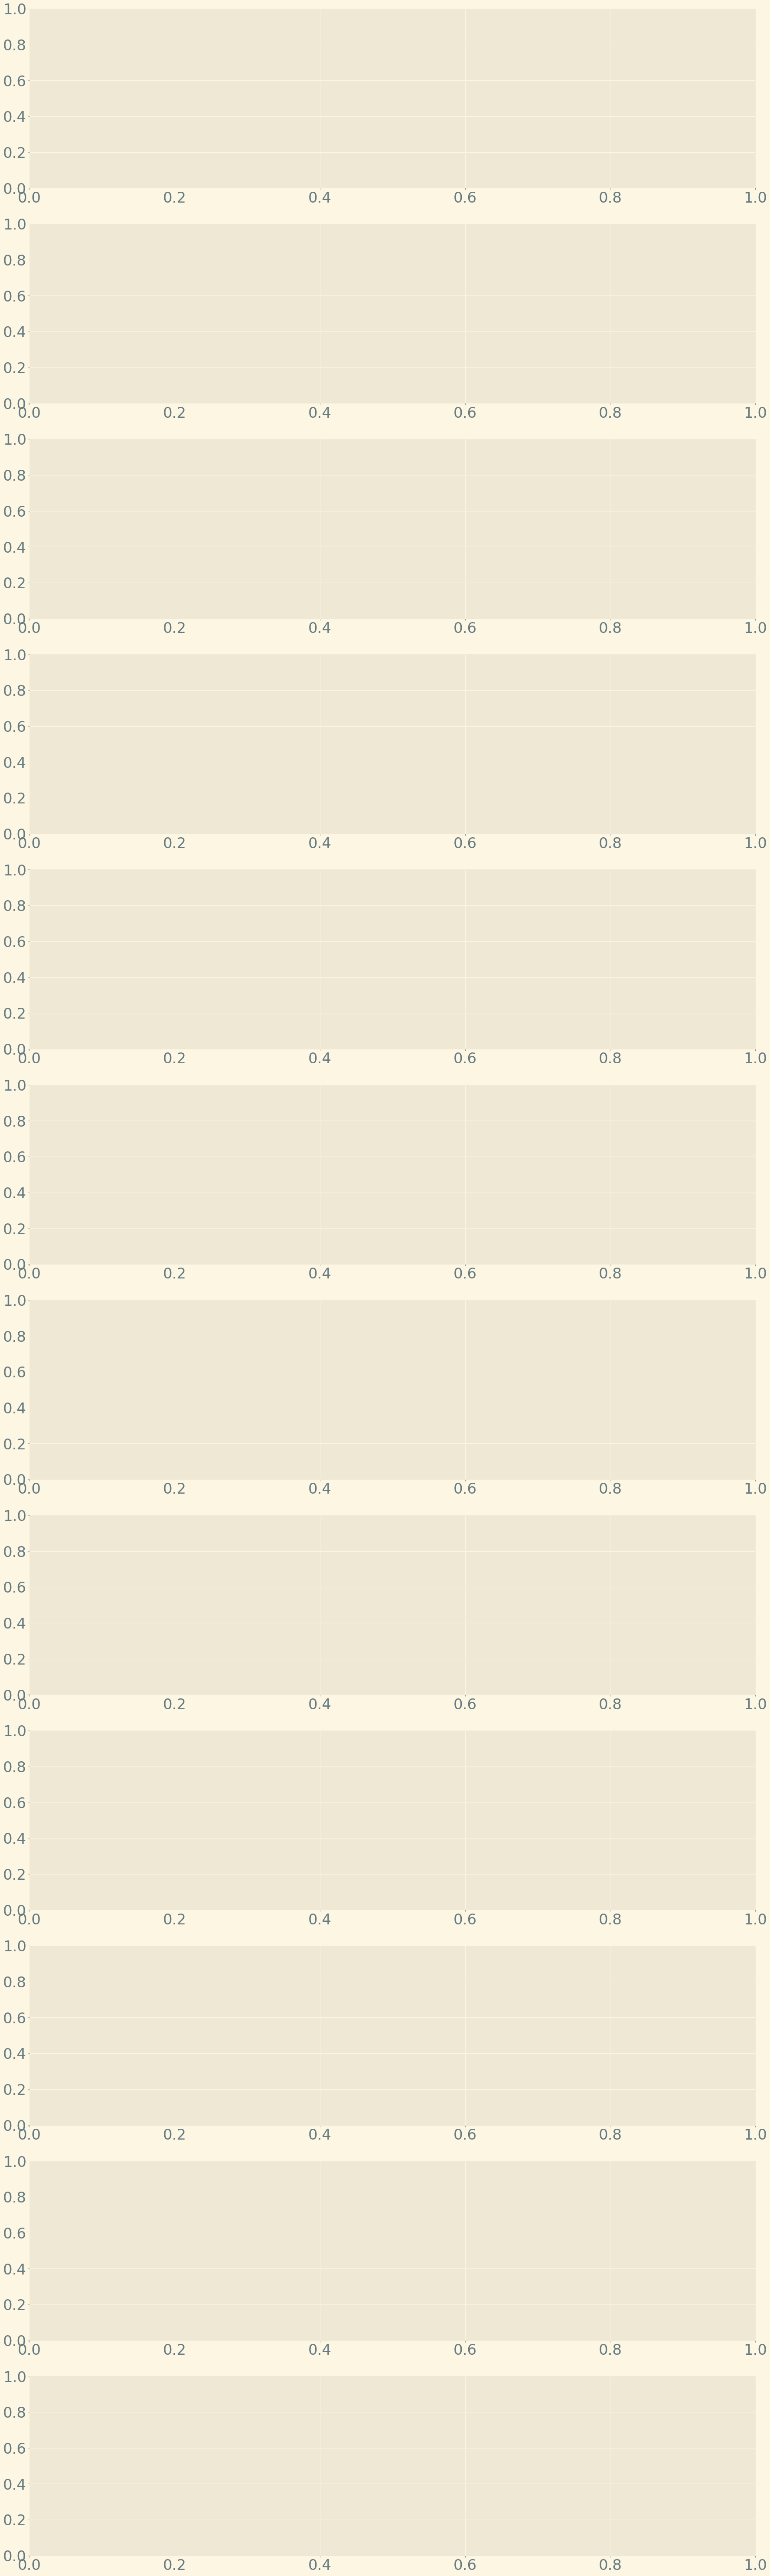

In [33]:
plot_everything('/home/b502b586/ardupilot-workspace/ns3-mavsdk/build/src/ardupilot/examples', 'png')

In [ ]:
def print_f_bw_comparison(data):
    print("{:<4}: # ".format('f\\bw'), end='')
    print("{:<8} {:<8} {:<8} {:<8} {:<8} {:<8}".format(*valid_bw))
    print("#" * 56)
    avg_rx_rate_results = np.round(data, 4)
    avg_rx_rate_results[data == -1] = 0
    for f_i, f in enumerate(valid_frequencies):
        print("{:<4}: # ".format(f), end='')
        print("{:<8} {:<8} {:<8} {:<8} {:<8} {:<8}".format(*data[f_i]))
        

# print('Avg. reception rate of VQ:800p and no Freq. reuse:')
# print_f_bw_comparison(avg_rx_rate_results[:, :, 0, 0])
# print('\n\n')

# print('Avg. reception rate of VQ:1280p and no Freq. reuse:')
# print_f_bw_comparison(avg_rx_rate_results[:, :, 1, 0])
# print('\n\n')

print('Avg. reception rate of VQ:1920p and no Freq. reuse:')
print_f_bw_comparison(avg_rx_rate_results[:, :, 2, 0])
print('\n\n')




# print('Avg. reception rate of VQ:800p and LteFfrSoftAlgorithm:')
# print_f_bw_comparison(avg_rx_rate_results[:, :, 0, 4])
# print('\n\n')

# print('Avg. reception rate of VQ:1280p and LteFfrSoftAlgorithm:')
# print_f_bw_comparison(avg_rx_rate_results[:, :, 1, 4])
# print('\n\n')

print('Avg. reception rate of VQ:1920p and LteFfrSoftAlgorithm:')
print_f_bw_comparison(avg_rx_rate_results[:, :, 2, 4])
print('\n\n')

